In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
population_file = 'uscities.csv'
v = pd.read_csv(population_file,
               sep=',')
v

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,Gross,Gross,NE,Nebraska,31015,Boyd,42.9461,-98.5697,2,6,polygon,False,True,America/Chicago,3,68719,1840011032
28334,Lotsee,Lotsee,OK,Oklahoma,40143,Tulsa,36.1334,-96.2091,2,39,polygon,False,True,America/Chicago,3,74063,1840021674
28335,The Ranch,The Ranch,MN,Minnesota,27087,Mahnomen,47.3198,-95.6952,2,2,polygon,False,True,America/Chicago,3,56557,1840039629
28336,Shamrock,Shamrock,OK,Oklahoma,40037,Creek,35.9113,-96.5772,2,2,polygon,False,True,America/Chicago,3,74068,1840022701


In [3]:
v.loc[v.state_name == 'District of Columbia','state_name'] = 'District Of Columbia'

In [4]:
state_population = v[['state_name','population']].groupby(['state_name']).sum()
state_population

,population
state_name,
Alabama,4392298
Alaska,739126
Arizona,9953669
Arkansas,2665795
California,59652083
Colorado,7734597
Connecticut,4074019
Delaware,565804
District Of Columbia,5379184


In [5]:
pollution_file = 'pollution_2000_2021.csv'
v1 = pd.read_csv(pollution_file,
               sep=',')
v1

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,2021-06-26,2021,6,26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.040588,0.049,...,0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2
608695,2021-06-27,2021,6,27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.037882,0.042,...,0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2
608696,2021-06-28,2021,6,28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.039765,0.050,...,0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5
608697,2021-06-29,2021,6,29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.049176,0.058,...,0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7


In [6]:
now_v1 = v1[v1['Year']>2019]
state_pollution = now_v1[['State','O3 AQI','SO2 AQI','NO2 AQI','CO AQI']].groupby(['State']).mean()
state_pollution

,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
State,,,,
Alabama,36.220077,2.554054,18.316602,4.009653
Arizona,49.652973,0.730811,23.374595,4.990270
Arkansas,33.051643,0.901408,16.441315,3.763693
California,42.655492,0.614116,17.925100,5.117061
Colorado,46.059559,1.304348,29.097082,4.807028
Connecticut,34.643443,0.155738,22.967213,3.391393
Delaware,34.395010,1.621622,19.160083,3.580042
District Of Columbia,39.329958,1.161181,17.208439,3.717300
Florida,34.630342,1.119658,7.532051,6.047009


In [7]:
p_poll = pd.concat([state_population,state_pollution],axis=1)
p_poll=p_poll.dropna() # drop the rows with na
p_poll

,population,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
Alabama,4392298,36.220077,2.554054,18.316602,4.009653
Arizona,9953669,49.652973,0.730811,23.374595,4.990270
Arkansas,2665795,33.051643,0.901408,16.441315,3.763693
California,59652083,42.655492,0.614116,17.925100,5.117061
Colorado,7734597,46.059559,1.304348,29.097082,4.807028
Connecticut,4074019,34.643443,0.155738,22.967213,3.391393
Delaware,565804,34.395010,1.621622,19.160083,3.580042
District Of Columbia,5379184,39.329958,1.161181,17.208439,3.717300
Florida,31031088,34.630342,1.119658,7.532051,6.047009
Georgia,11192163,32.697171,0.069884,17.146423,4.823627


In [10]:
min_max_scaler = lambda x: (x-np.min(x))/(np.max(x)-np.min(x))
standardlize_p_poll = p_poll.apply(min_max_scaler).sort_values('population',ascending=False)
standardlize_p_poll



# data normalization process, to make the data valuses into same scale.

,population,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
California,1.000000,0.548754,0.213153,0.591507,0.802568
New York,0.606063,0.363292,0.257963,0.754880,0.464248
Texas,0.563444,0.372142,0.250573,0.611127,0.397455
Florida,0.518229,0.295904,0.402559,0.211495,1.000000
Illinois,0.300639,1.000000,0.378776,0.365823,0.240992
Pennsylvania,0.255851,0.346102,0.410105,0.415823,0.227570
Ohio,0.228411,0.303262,1.000000,0.549345,0.403180
Georgia,0.184285,0.234995,0.009252,0.563036,0.740271
Washington,0.171889,0.100485,0.201419,0.619408,0.330736
Michigan,0.171015,0.384487,0.246637,0.588293,0.899914


<AxesSubplot:>

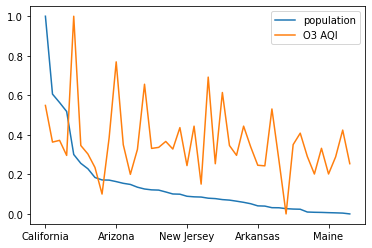

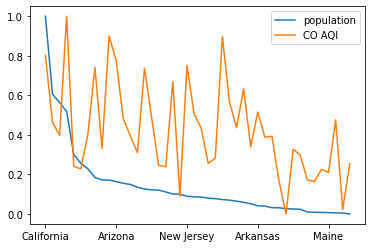

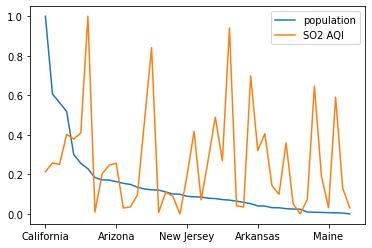

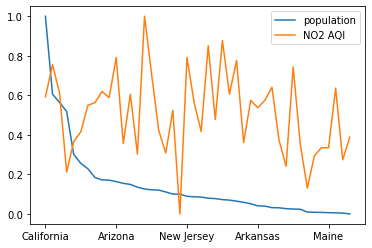

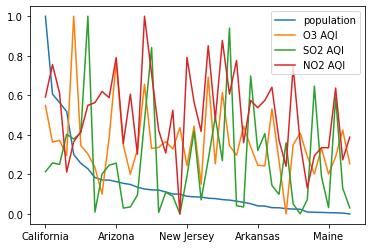

In [11]:
standardlize_p_poll[['population','O3 AQI']].plot()
standardlize_p_poll[['population','CO AQI']].plot()
standardlize_p_poll[['population','SO2 AQI']].plot()
standardlize_p_poll[['population','NO2 AQI']].plot()
standardlize_p_poll[['population','O3 AQI','SO2 AQI','NO2 AQI']].plot()


In [67]:
gdp_file = 'gdp.csv'
v2 = pd.read_csv(gdp_file,
               sep=',')
v2 = v2[v2['LineCode'] == 1]
v2

,GeoFips,GeoName,LineCode,Description,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1000,Alabama,1,Real GDP (millions of chained 2012 dollars),144501.2,149568.2,154900.2,157221.3,156853.2,160422.4,...,189245.5,191369.8,189886.3,191335.2,194283.8,197566.6,200800.9,203383.9,196906.1,204884.6
8,2000,Alaska,1,Real GDP (millions of chained 2012 dollars),42211.3,41095.9,40590.5,39406.6,40958.7,42979.0,...,58283.6,55354.3,54188.2,54740.8,54246.6,54129.5,53249.6,53336.5,50161.0,50300.3
16,4000,Arizona,1,Real GDP (millions of chained 2012 dollars),168408.8,183060.5,198699.9,208439.5,213166.2,220696.7,...,271440.0,273481.9,276948.9,282577.0,291275.2,302455.4,313618.7,323894.3,320550.6,337424.7
24,5000,Arkansas,1,Real GDP (millions of chained 2012 dollars),82571.3,84570.8,89115.2,89871.7,89789.0,92950.5,...,108492.1,110752.4,111734.5,112351.0,112798.1,113885.2,115937.6,116790.9,114943.5,120710.5
32,6000,California,1,Real GDP (millions of chained 2012 dollars),1378276.5,1468730.8,1574305.9,1696172.4,1692324.1,1722522.4,...,2113096.4,2179229.0,2256054.7,2357452.9,2427894.6,2541769.3,2643576.3,2739343.4,2663665.9,2871424.2
40,8000,Colorado,1,Real GDP (millions of chained 2012 dollars),184185.3,200679.7,215294.6,231589.8,234979.4,235417.3,...,276823.1,286259.1,298655.3,312409.7,318953.4,329960.6,342535.9,356773.6,346011.3,365918.3
48,9000,Connecticut,1,Real GDP (millions of chained 2012 dollars),190518.9,196391.1,202351.7,216157.6,218135.3,216677.7,...,240911.9,236050.6,235780.9,242706.5,243286.7,247358.5,249998.1,251495.1,235888.6,245782.6
56,10000,Delaware,1,Real GDP (millions of chained 2012 dollars),45980.1,50434.3,54236.7,56550.2,58372.7,56534.5,...,62354.6,60235.8,64940.1,66793.5,63001.3,60801.2,61735.1,64262.4,62056.2,64338
64,11000,District of Columbia,1,Real GDP (millions of chained 2012 dollars),79827.7,81214.4,84756.2,85355.9,88440.7,91141.5,...,112157.0,112332.4,114553.6,116808.4,119644.3,120898.9,123836.1,124990.3,122342.1,125795.8
72,12000,Florida,1,Real GDP (millions of chained 2012 dollars),559805.3,587970.7,615238.2,642708.2,660659.5,689974.0,...,778545.0,794842.1,817233.5,852242.4,881539.2,912966.2,943463.4,971619.2,944000.8,1008694


In [82]:
gdp_2020 = v2[['GeoName','2020']].groupby('GeoName').sum()
gdp_poll = pd.concat([gdp_2020,state_pollution],axis=1)
gdp_poll = gdp_poll.dropna()
gdp_poll

,2020,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
Alabama,196906.1,36.220077,2.554054,18.316602,4.009653
Arizona,320550.6,49.652973,0.730811,23.374595,4.990270
Arkansas,114943.5,33.051643,0.901408,16.441315,3.763693
California,2663665.9,42.655492,0.614116,17.925100,5.117061
Colorado,346011.3,46.059559,1.304348,29.097082,4.807028
Connecticut,235888.6,34.643443,0.155738,22.967213,3.391393
Delaware,62056.2,34.395010,1.621622,19.160083,3.580042
Florida,944000.8,34.630342,1.119658,7.532051,6.047009
Georgia,536693.0,32.697171,0.069884,17.146423,4.823627
Hawaii,70625.2,25.238692,1.005995,8.331335,1.336785


<AxesSubplot:>

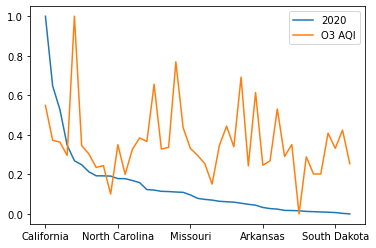

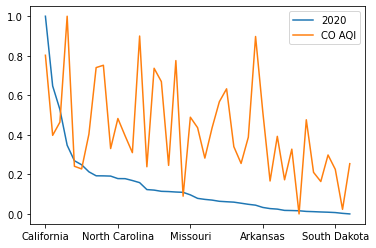

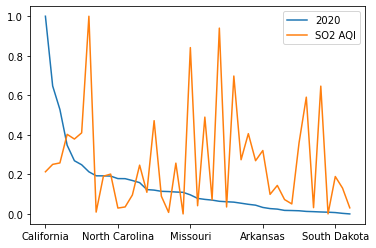

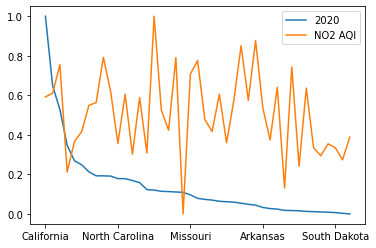

In [86]:
standardlize_gdp_poll = gdp_poll.apply(min_max_scaler).sort_values('2020',ascending=False)
standardlize_gdp_poll[['2020','O3 AQI']].plot()
standardlize_gdp_poll[['2020','CO AQI']].plot()
standardlize_gdp_poll[['2020','SO2 AQI']].plot()
standardlize_gdp_poll[['2020','NO2 AQI']].plot()

In [105]:
ca_poll = v1[v1['State'] == 'California'].groupby('Year').mean()
ca_poll

,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
Year,,,,,,,,,,,,,,,,,,
2000,6.619995,15.805683,0.025479,0.036392,10.443281,36.542108,0.647333,0.990486,7.742177,11.267717,1.729387,4.283629,7.633916,6.044754,17.577458,31.664174,11.672803,29.990336
2001,6.665878,15.781734,0.026781,0.038057,10.602732,38.355637,0.625407,0.932659,7.543137,10.617793,1.823210,4.494030,7.439006,6.334768,17.759348,32.165770,11.610693,30.484402
2002,6.401892,15.678527,0.028277,0.039338,10.607569,39.520568,0.604988,0.903826,7.456911,10.291135,1.636439,3.901779,7.351399,5.477067,16.760650,30.411148,11.654669,28.797306
2003,6.339169,15.677903,0.027660,0.038716,10.618530,39.956394,0.576468,0.850892,7.300674,9.720313,1.502778,3.440637,7.162897,4.823619,15.776083,29.104937,11.482601,27.553936
2004,6.596450,15.789467,0.027862,0.038584,10.514793,38.810414,0.519910,0.756320,7.067929,8.615385,1.841437,3.945846,7.136095,5.535385,15.139255,27.842249,11.522367,26.364852
2005,6.472299,15.694598,0.027054,0.037517,10.683864,37.305863,0.461366,0.666921,6.924400,7.589335,1.665112,3.556671,6.926593,4.967105,13.957145,25.903855,11.385272,24.513620
2006,6.498888,15.758225,0.028303,0.039062,10.593139,38.945674,0.446391,0.647629,6.642196,7.399836,1.391615,3.415186,7.184288,4.761269,14.012312,26.469266,11.261094,25.061819
2007,6.613700,15.736506,0.028601,0.038796,10.660633,38.414806,0.415237,0.589465,6.245719,6.690765,1.215131,2.819857,6.756232,3.916865,13.020272,24.919033,10.999241,23.573380
2008,6.510605,15.793373,0.028934,0.039834,10.761998,40.876747,0.392384,0.558450,6.438374,6.337699,1.101408,2.564070,6.396344,3.550875,12.984256,25.072329,11.059623,23.731698


<AxesSubplot:xlabel='Year'>

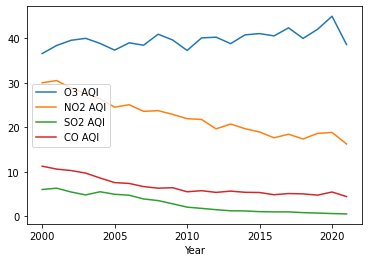

In [98]:
ca_poll[['O3 AQI','NO2 AQI','SO2 AQI','CO AQI']].plot()

In [125]:
city_gdp_file = 'city_gdp.csv'
v3 = pd.read_csv(city_gdp_file,
               sep=',')
v3 = v3.groupby('Year').mean()

<AxesSubplot:xlabel='Year'>

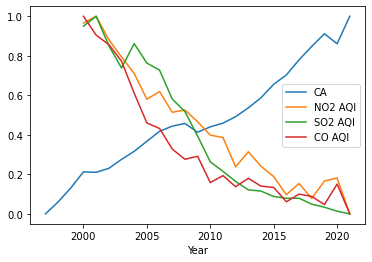

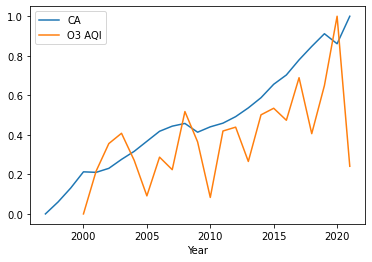

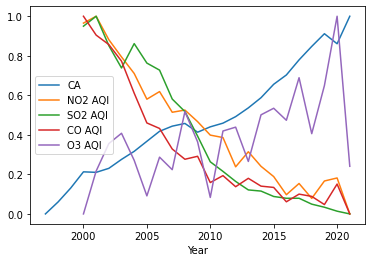

In [132]:
ca_gdp_poll = pd.concat([v3,ca_poll],axis=1)
ca_gdp_poll.dropna()
standardlize_ca_gdp_poll = ca_gdp_poll.apply(min_max_scaler)
standardlize_ca_gdp_poll[['CA','NO2 AQI','SO2 AQI','CO AQI']].plot()
standardlize_ca_gdp_poll[['CA','O3 AQI']].plot()
standardlize_ca_gdp_poll[['CA','NO2 AQI','SO2 AQI','CO AQI','O3 AQI']].plot()

<AxesSubplot:xlabel='Year'>

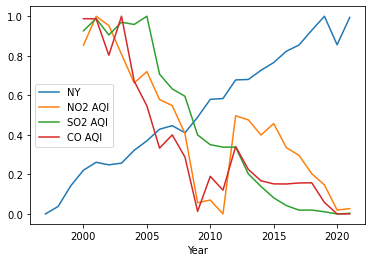

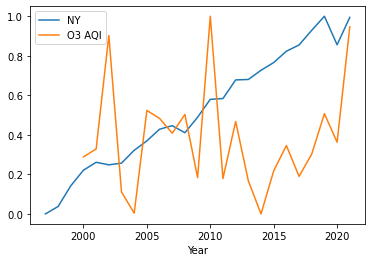

In [122]:
ny_poll = v1[v1['State'] == 'New York'].groupby('Year').mean()
ny_gdp_poll = pd.concat([v3,ny_poll],axis=1)
ny_gdp_poll.dropna()
standardlize_ny_gdp_poll = ny_gdp_poll.apply(min_max_scaler)
standardlize_ny_gdp_poll[['NY','NO2 AQI','SO2 AQI','CO AQI']].plot()
standardlize_ny_gdp_poll[['NY','O3 AQI']].plot()

<AxesSubplot:xlabel='Year'>

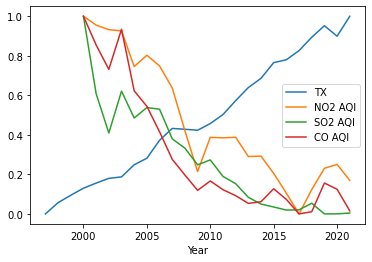

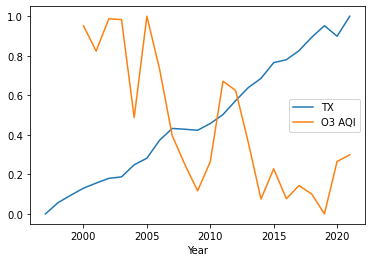

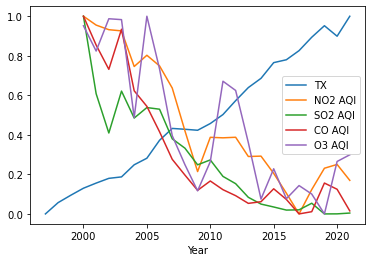

In [133]:
tx_poll = v1[v1['State'] == 'Texas'].groupby('Year').mean()
tx_gdp_poll = pd.concat([v3,tx_poll],axis=1)
tx_gdp_poll.dropna()
standardlize_tx_gdp_poll = tx_gdp_poll.apply(min_max_scaler)
standardlize_tx_gdp_poll[['TX','NO2 AQI','SO2 AQI','CO AQI']].plot()
standardlize_tx_gdp_poll[['TX','O3 AQI']].plot()
standardlize_tx_gdp_poll[['TX','NO2 AQI','SO2 AQI','CO AQI','O3 AQI']].plot()